In [2]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


In [3]:
cd My\ Drive

/gdrive/My Drive


In [4]:
cd Colab\ Notebooks

/gdrive/My Drive/Colab Notebooks


In [5]:
cd numbers/

/gdrive/My Drive/Colab Notebooks/numbers


In [6]:
ls

1.png  2.png  3.png  4.png  5.png  6.png  mnist.h5


In [7]:
from keras.models import load_model

model = load_model('mnist.h5')

Using TensorFlow backend.
W0903 08:20:11.733344 139835397728128 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:541: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0903 08:20:11.749357 139835397728128 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4432: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0903 08:20:11.766791 139835397728128 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:66: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0903 08:20:11.767939 139835397728128 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:148: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instea

In [8]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
activation_1 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
activation_2 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

In [0]:
def val(pred):
  m = np.max(pred)
  for i in range(10):
    if m == pred[0,i]:
      return i

 62%|██████▎   | 5/8 [00:00<00:00, 41.36it/s]

5
2
5
5
6
5
5


100%|██████████| 8/8 [00:00<00:00, 15.92it/s]

5


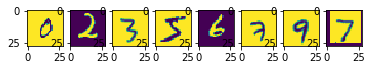

In [17]:
from keras.preprocessing import image
import matplotlib.pyplot as plt
import cv2 
import numpy as np
from tqdm import tqdm

for i in tqdm(range(1,9)):
  img = image.load_img(str(i)+'.png', target_size = (28,28,3))
  img = image.img_to_array(img)


  img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  plt.subplot(1,8,i)
  plt.imshow(img)

  img = img/255


  img = np.asarray(img)
  img = img.reshape(1,784)
  pred = model.predict(img)
  print(val(pred))
  